<a href="https://colab.research.google.com/github/ManuelVR461/redesneuronales/blob/master/redesneuronales1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

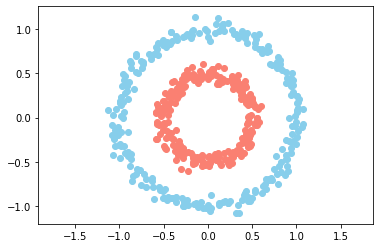

In [56]:
#CREAR el Dataset

#numero de registros {500 personas}
n = 500

#cuantas caracteristicas hay en este dato. {altura y edad}
p = 2

X,Y = make_circles(n_samples=n, factor=0.5,noise=0.05)
plt.scatter(X[Y==0,0],X[Y==0,1],c="skyblue")
plt.scatter(X[Y==1,0],X[Y==1,1],c="salmon")
plt.axis("equal")
plt.show()

In [0]:
#clase de la capa de la red
class capa_neural():
  def __init__(self,n_conexiones,n_neuronas,funcion_activacion):
    self.funcion_activacion = funcion_activacion
    self.b = np.random.rand(1           ,n_neuronas) * 2 - 1
    self.w = np.random.rand(n_conexiones,n_neuronas) * 2 - 1


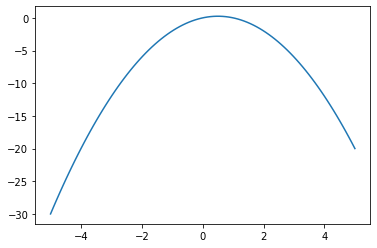

In [58]:
#funciones de activacion

#0 funcion sigmoide
#1 derivada de la funcion
sign = (lambda x: 1/(1 + np.e ** (-x)),
        lambda x: x * (1 - x));

#function relu
relu = lambda x: np.maximum(0,x);


_x = np.linspace(-5,5,100);
plt.plot(_x,sign[1](_x));

In [0]:
##l0 = capa_neural(p,4,sign);
##l1 = capa_neural(4,8,sign);
#...

def crear_red_reural(topologia,funcion_activacion):
  nn = [];
  for i, layer in enumerate(topologia[:-1]):
    nn.append(capa_neural(topologia[i],topologia[i+1],funcion_activacion));
  return nn;


In [68]:
topologia = [p,4,8,16,8,4,1];
neural_net = crear_red_reural(topologia,sign);
print(neural_net)

[<__main__.capa_neural object at 0x7feeec93a128>, <__main__.capa_neural object at 0x7feeec93a1d0>, <__main__.capa_neural object at 0x7feeec93a208>, <__main__.capa_neural object at 0x7feeec93a240>, <__main__.capa_neural object at 0x7feeec93a278>, <__main__.capa_neural object at 0x7feeec93a2b0>]


In [0]:
funcion_coste = (lambda Yp,Yr: np.mean((Yp -Yr) ** 2),
                 lambda Yp, Yr: (Yp - Yr));

In [77]:
def entrenamiento(neural_net,X,Y,funcion_coste,lr = 0.5,entrenar=True):  
  #forward pass
  out = [(None,X)];
  for i, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[i].w + neural_net[i].b;
    a = neural_net[i].funcion_activacion[0](z);
    out.append((z,a));
  
  print(funcion_coste[0](out[-1][1],Y))

  if entrenar:
    #backward pass
    deltas = []
    for i in reversed(range(0, len(neural_net) )):
      z = out[i+1][0];
      a = out[i+1][1];

      print(a.shape)
      if i == len(neural_net) -1:
        #calcular delta ultima capa
        deltas.insert(0,funcion_coste[1](a,Y) * neural_net[i].funcion_activacion[1](a))
      else:
        deltas.insert(0,deltas[0] @ neural_net[i+1].w * neural_net[i].funcion_activacion[1](a))

      print(deltas)
      #gradiente descent
      neural_net[i].b = neural_net[i].b - np.mean(deltas[0],axis=)



entrenamiento(neural_net,X,Y,funcion_coste,lr = 0.5);


0.2505450662376172
(500, 1)
(500, 4)
(500, 8)
(500, 16)
(500, 8)
(500, 4)
[array([[ 0.11878034, -0.13065324, -0.13065324, ..., -0.13065324,
         0.11878034,  0.11878034],
       [ 0.11895293, -0.13051046, -0.13051046, ..., -0.13051046,
         0.11895293,  0.11895293],
       [ 0.11897346, -0.13049343, -0.13049343, ..., -0.13049343,
         0.11897346,  0.11897346],
       ...,
       [ 0.11893071, -0.13052889, -0.13052889, ..., -0.13052889,
         0.11893071,  0.11893071],
       [ 0.11877538, -0.13065733, -0.13065733, ..., -0.13065733,
         0.11877538,  0.11877538],
       [ 0.11903735, -0.13044036, -0.13044036, ..., -0.13044036,
         0.11903735,  0.11903735]])]
